In [53]:
import pandas as pd
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"]=300
import seaborn as sns
sns.set(style="darkgrid", palette="muted", color_codes=True)

In [2]:
data_dir = "ensembl_data"
sec = 4

found_num=[]
not_found_num=[]
no_match_num=[]
for i in range(sec):
    found = pd.read_csv(os.path.join(data_dir,"ensembl_trans_seq"+str(i+1)+".csv"),index_col=0)
    no_match = np.load(os.path.join(data_dir,"no_match_list"+str(i+1)+".npy"))
    not_found = np.load(os.path.join(data_dir,"not_found_list"+str(i+1)+".npy"))

    found_num.append(len(found))
    not_found_num.append(len(not_found))
    no_match_num.append(len(no_match))


In [8]:
print(found_num,not_found_num,no_match_num)

[26289, 24432, 24019, 24640] [26, 32, 29, 26] [236, 2087, 2503, 1888]


In [3]:
print(sum(found_num))

99380


In [4]:
found1 = pd.read_csv(os.path.join(data_dir,"ensembl_trans_seq"+str(1)+".csv"),index_col=0)

In [19]:
for i in range(4):
    tmp_df = pd.read_csv(os.path.join(data_dir,"ensembl_trans_seq"+str(i+1)+".csv"),index_col=0)
    full = tmp_df[tmp_df.isnull().sum(axis=1)==0]
    drop = tmp_df[tmp_df.isnull().sum(axis=1)!=0]

    if i==0:
        full_tot = full
        drop_tot = drop
    else:
        full_tot = pd.concat([full_tot,full])
        drop_tot = pd.concat([drop_tot,drop])


In [21]:
full_tot.to_csv(os.path.join(data_dir,"full_found_trans.csv"))
drop_tot.to_csv(os.path.join(data_dir,"drop_trans.csv"))

In [23]:
utr_db = pd.read_csv("data/homo_sapience_utr.csv",index_col=0)

In [39]:
utr_db.loc[:,"Transcript"]

0         ENST00000524270
1         ENST00000524270
2         ENST00000524270
3         ENST00000523102
4         ENST00000523102
               ...       
374700    ENST00000397325
374701    ENST00000368916
374702    ENST00000368916
374703    ENST00000368918
374704    ENST00000368918
Name: Transcript, Length: 374705, dtype: object

In [45]:
len(drop_tot.iloc[0]["cds"])

3201

In [51]:
full_tot["five_length"]=list(map(len,full_tot["fiveprime"].values))
full_tot["three_length"]=list(map(len,full_tot["threeprime"].values))
full_tot["cds_length"]=list(map(len,full_tot["cds"].values))
full_tot["total_length"]=full_tot["five_length"]+full_tot["three_length"]+full_tot["cds_length"]


In [64]:
full_tot[["five_length","three_length","cds_length"]].describe()

,five_length,three_length,cds_length
count,75234.000000,75234.000000,75234.000000
mean,225.090903,1321.943829,1402.947045
std,265.970175,1644.314630,1628.249163
min,1.000000,1.000000,3.000000
25%,72.000000,289.000000,486.000000
50%,152.000000,729.000000,1032.000000
75%,287.000000,1775.000000,1782.000000
max,7720.000000,32870.000000,107976.000000


In [70]:
full_tot.sort_values("cds_length",ascending=False)

,trans_id,gene,fiveprime,threeprime,cds,five_length,three_length,cds_length,total_length
23201,ENST00000589042,TTN,GAGCAGTCGTGCATTCCCAGCCTCGCCTCGGGTGTAGGGATTGCAT...,GAGGGCCTGTGCCCTTATACTCTACACTCATTCTTAACTTTTCGCA...,ATGACAACTCAAGCACCGACGTTTACGCAGCCGTTACAAAGCGTTG...,225,1023,107976,109224
23890,ENST00000591111,TTN,GAGCAGTCGTGCATTCCCAGCCTCGCCTCGGGTGTAGGGATTGCAT...,GAGGGCCTGTGCCCTTATACTCTACACTCATTCTTAACTTTTCGCA...,ATGACAACTCAAGCACCGACGTTTACGCAGCCGTTACAAAGCGTTG...,225,1023,103053,104301
13036,ENST00000342992,TTN,GAGCAGTCGTGCATTCCCAGCCTCGCCTCGGGTGTAGGGATTGCAT...,GAGGGCCTGTGCCCTTATACTCTACACTCATTCTTAACTTTTCGCA...,ATGACAACTCAAGCACCGACGTTTACGCAGCCGTTACAAAGCGTTG...,225,1023,100272,101520
16868,ENST00000460472,TTN,GAGCAGTCGTGCATTCCCAGCCTCGCCTCGGGTGTAGGGATTGCAT...,GAGGGCCTGTGCCCTTATACTCTACACTCATTCTTAACTTTTCGCA...,ATGACAACTCAAGCACCGACGTTTACGCAGCCGTTACAAAGCGTTG...,225,1023,80781,82029
995,ENST00000397910,MUC16,AAGCGTTGCACAATTCCCCCAACCTCCATACATACGGCAGCTCTTC...,CTGGAACTTGCCGGTGCCTGGGGTGCCTTTCCCCCAGCCAGGGTCC...,ATGCTGAAACCCTCAGGCCTTCCTGGGTCATCTTCTCCCACCCGCT...,204,88,43524,43816
...,...,...,...,...,...,...,...,...,...
6908,ENST00000636197,ATP1A3,TGTGTGCGGAGATCCGCGAGGTTGTGGGCCAGCCCTCAGCATCTCC...,TGCACAGTTGCATGACAAGAAAGATGACAAGGACTCACCCAAGAAG...,ATG,66,100,3,169
2348,ENST00000602051,MRLN,ACA,GGTGGCCGGGCAGAGACGCTCCTCACTTCCTAGACAGGATGACGGC...,ATG,3,280,3,286
17816,ENST00000467006,TIRAP,AGCCCGCGCAGTCCGCGCAGCCCTCATCGCAACTGGGCCCGCGCGC...,GCGTCTTGGATTCCAGGAAGTAGGCAGTGTGTATGGTTACTGGAAT...,ATG,96,468,3,567
12355,ENST00000546961,SCN8A,ACAGACGAGAACACTGAGGTTTGGAGAGGTTGTTACACCCTTTTTC...,CTCATGCCTACTTTACAGATGGACAGACTGAGGATCGGAAAGACTG...,ATG,158,304,3,465


In [65]:
full_tot.to_csv(os.path.join(data_dir,"full_found_trans.csv"))
drop_tot.to_csv(os.path.join(data_dir,"drop_trans.csv"))

<AxesSubplot:>

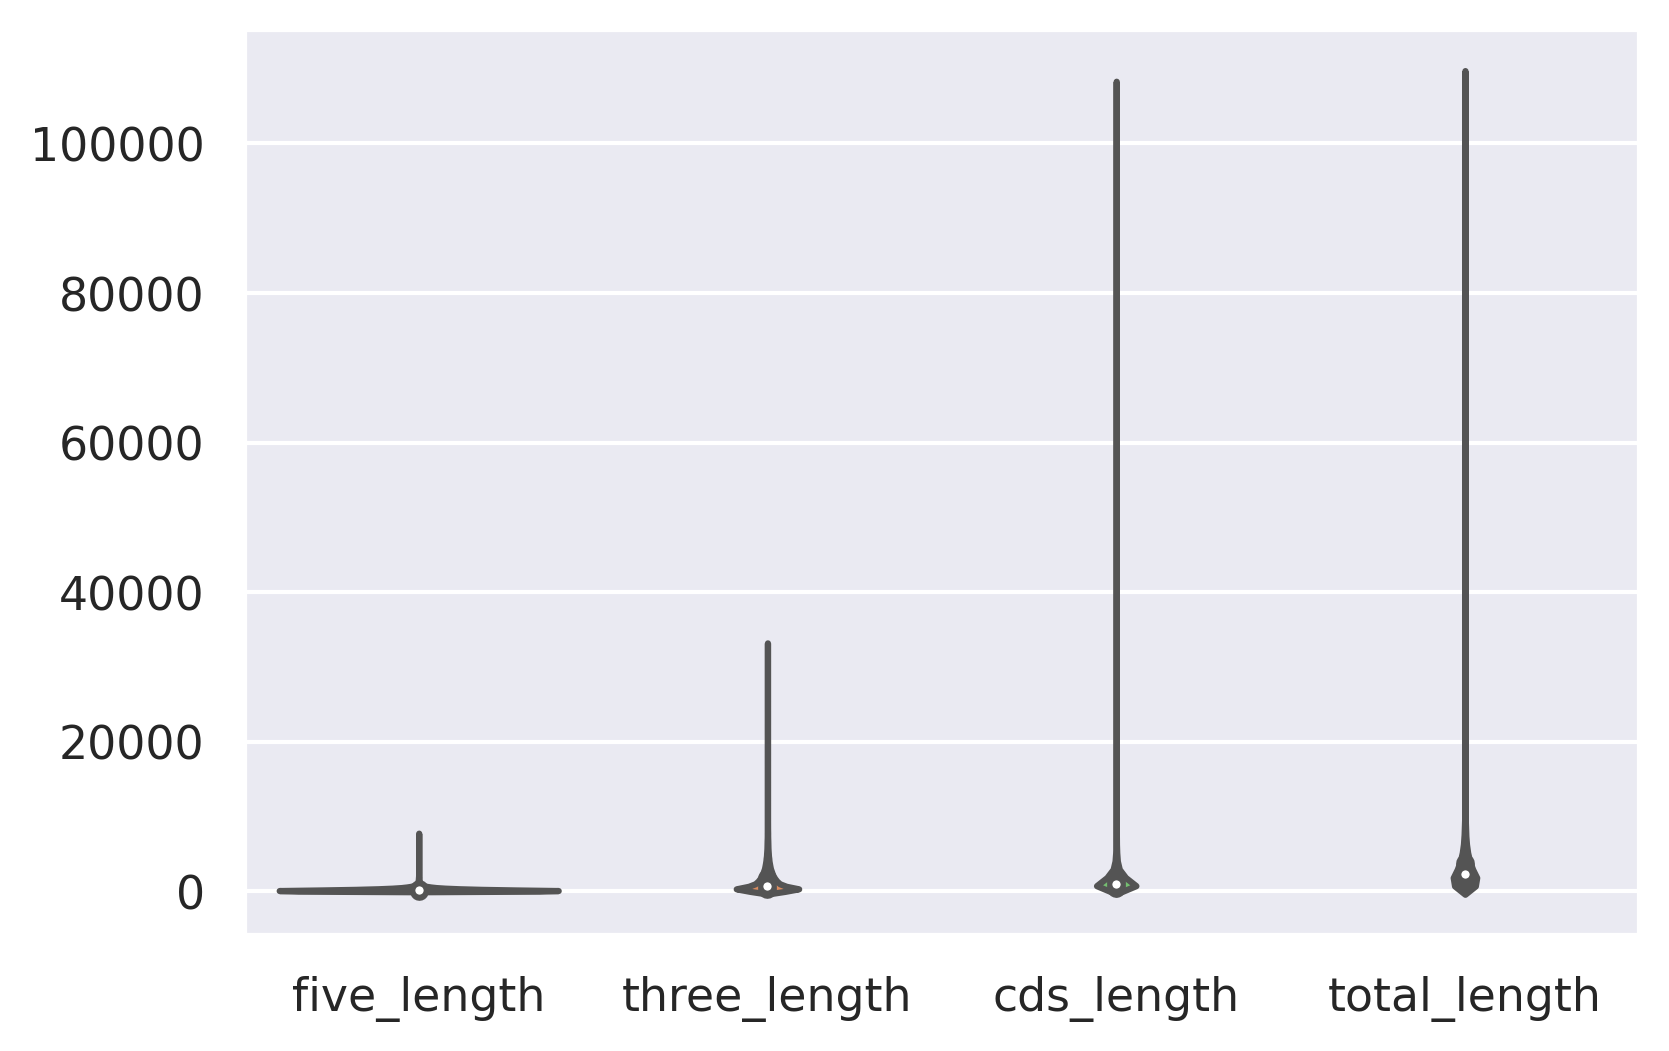

In [61]:
sns.violinplot(data=full_tot)

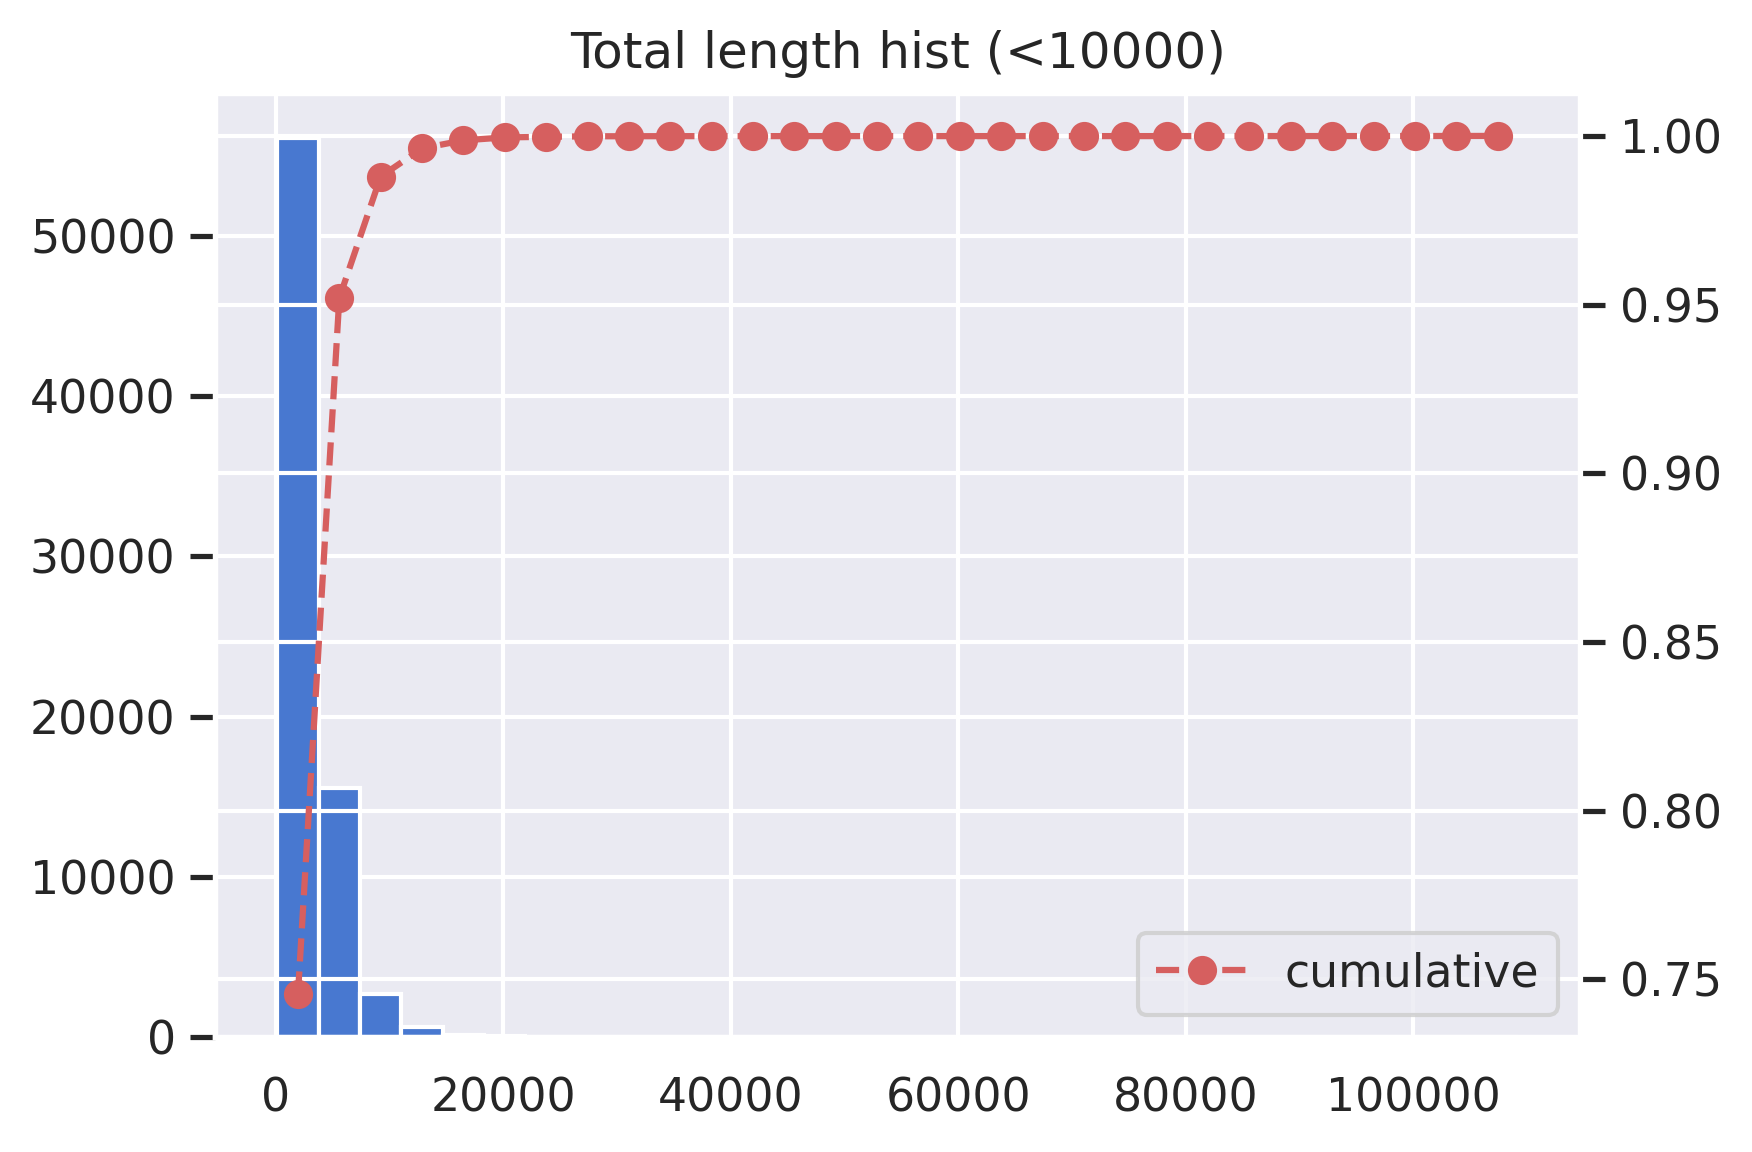

In [71]:
fig,ax1 = plt.subplots()
#utr_short = full_tot[full_tot["cds_length"]<10000]
utr_short = full_tot

ax1.set_title("Total length hist (<10000)")
n,bins,patches = plt.hist(utr_short["total_length"].values,bins=30)

y2 = np.add.accumulate(n) / n.sum()
x2 = np.convolve(bins, np.ones(2) / 2, mode="same")[1:]

ax2 = ax1.twinx()
lines = ax2.plot(x2,y2,ls="--",color="r",marker="o",label="cumulative")
#plt.text(800,50000,f"min={minlen}\nmax={maxlen}\nmean={mean:.2f}")
plt.legend()
plt.tight_layout()
#plt.savefig("5'UTR_length_hist_under10000_cum",facecolor="white")
plt.show()
#ax.set_xscale("log")